In [1]:
import pandas as pd
import ast
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df=pd.read_csv('movies.csv')

In [3]:
df

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,FALSE,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,FALSE,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,FALSE,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,FALSE,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,FALSE,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20247,FALSE,"{'id': 59235, 'name': 'Jesse Stone Collection'...",0,"[{'id': 10770, 'name': 'TV Movie'}, {'id': 80,...",http://www.cbs.com/specials/stone_cold/,31046,tt0431420,en,Stone Cold,Jesse Stone is a former L.A. homicide detectiv...,...,2005-02-20,0.0,87.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Jesse Stone: Stone Cold,False,6.5,33.0
20248,FALSE,"{'id': 59235, 'name': 'Jesse Stone Collection'...",0,"[{'id': 18, 'name': 'Drama'}, {'id': 53, 'name...",http://www.cbs.com/specials/death_in_paradise/,30347,tt0800095,en,Jesse Stone: Death in Paradise,Small-time police chief and struggling alcohol...,...,2006-04-30,0.0,87.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Jesse Stone: Death in Paradise,False,6.9,31.0
20249,FALSE,"{'id': 59235, 'name': 'Jesse Stone Collection'...",0,"[{'id': 10770, 'name': 'TV Movie'}, {'id': 18,...",NaN,26114,tt0905345,en,Jesse Stone: Sea Change,When Police Chief Jesse Stone's relationship w...,...,2007-05-22,0.0,88.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Jesse Stone: Sea Change,False,6.8,22.0
20250,FALSE,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 53, 'name...",NaN,106541,tt1507261,en,Cargo,"A young Russian woman, smuggled into America b...",...,2011-10-17,0.0,0.0,"[{'iso_639_1': 'fr', 'name': 'Français'}]",Released,What if you were the cargo?,Cargo,False,4.1,6.0


Exploratory data analysis

Data preprocessing 

In [4]:
#selecting the features 
df=df[['id','imdb_id','original_title','genres','release_date','vote_average','vote_count','overview','runtime','original_language',]]

In [5]:
#checking for null values 
df.isnull().sum()

id                     0
imdb_id                7
original_title         0
genres                 0
release_date          19
vote_average           2
vote_count             2
overview             139
runtime               30
original_language      1
dtype: int64

In [6]:
#dropping the null values 
df.dropna(inplace=True)


C:\Users\Amal_VT\AppData\Local\Temp\ipykernel_9764\1318884925.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


In [7]:
#changing the column name
column_mapping = {'id': 'movie_id', 'original_title': 'movie_title', 'vote_average': 'rating', 'vote_count': 'rating_count','original_language': 'language'}
df = df.rename(columns=column_mapping)


In [8]:
df.head()

,movie_id,imdb_id,movie_title,genres,release_date,rating,rating_count,overview,runtime,language
0,862,tt0114709,Toy Story,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",1995-10-30,7.7,5415.0,"Led by Woody, Andy's toys live happily in his ...",81.0,en
1,8844,tt0113497,Jumanji,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",1995-12-15,6.9,2413.0,When siblings Judy and Peter discover an encha...,104.0,en
2,15602,tt0113228,Grumpier Old Men,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",1995-12-22,6.5,92.0,A family wedding reignites the ancient feud be...,101.0,en
3,31357,tt0114885,Waiting to Exhale,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",1995-12-22,6.1,34.0,"Cheated on, mistreated and stepped on, the wom...",127.0,en
4,11862,tt0113041,Father of the Bride Part II,"[{'id': 35, 'name': 'Comedy'}]",1995-02-10,5.7,173.0,Just when George Banks has recovered from his ...,106.0,en


In [9]:
#checking the datatypes
df.dtypes

movie_id         object
imdb_id          object
movie_title      object
genres           object
release_date     object
rating          float64
rating_count    float64
overview         object
runtime         float64
language         object
dtype: object

In [10]:
#changing the datatype of release_date
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')


In [11]:
#modifying genres column
# Convert the string representation to a list of dictionaries
df['genres'] = df['genres'].apply(ast.literal_eval)

# Extract the genre names from the list of dictionaries
df['genres'] = df['genres'].apply(lambda x: [genre['name'] for genre in x])


In [12]:
df

,movie_id,imdb_id,movie_title,genres,release_date,rating,rating_count,overview,runtime,language
0,862,tt0114709,Toy Story,"[Animation, Comedy, Family]",1995-10-30,7.7,5415.0,"Led by Woody, Andy's toys live happily in his ...",81.0,en
1,8844,tt0113497,Jumanji,"[Adventure, Fantasy, Family]",1995-12-15,6.9,2413.0,When siblings Judy and Peter discover an encha...,104.0,en
2,15602,tt0113228,Grumpier Old Men,"[Romance, Comedy]",1995-12-22,6.5,92.0,A family wedding reignites the ancient feud be...,101.0,en
3,31357,tt0114885,Waiting to Exhale,"[Comedy, Drama, Romance]",1995-12-22,6.1,34.0,"Cheated on, mistreated and stepped on, the wom...",127.0,en
4,11862,tt0113041,Father of the Bride Part II,[Comedy],1995-02-10,5.7,173.0,Just when George Banks has recovered from his ...,106.0,en
...,...,...,...,...,...,...,...,...,...,...
20247,31046,tt0431420,Stone Cold,"[TV Movie, Crime, Drama, Thriller]",2005-02-20,6.5,33.0,Jesse Stone is a former L.A. homicide detectiv...,87.0,en
20248,30347,tt0800095,Jesse Stone: Death in Paradise,"[Drama, Thriller, Crime, Mystery]",2006-04-30,6.9,31.0,Small-time police chief and struggling alcohol...,87.0,en
20249,26114,tt0905345,Jesse Stone: Sea Change,"[TV Movie, Drama, Thriller, Crime]",2007-05-22,6.8,22.0,When Police Chief Jesse Stone's relationship w...,88.0,en
20250,106541,tt1507261,Cargo,"[Drama, Thriller]",2011-10-17,4.1,6.0,"A young Russian woman, smuggled into America b...",0.0,en


plotting no of movies vs rating

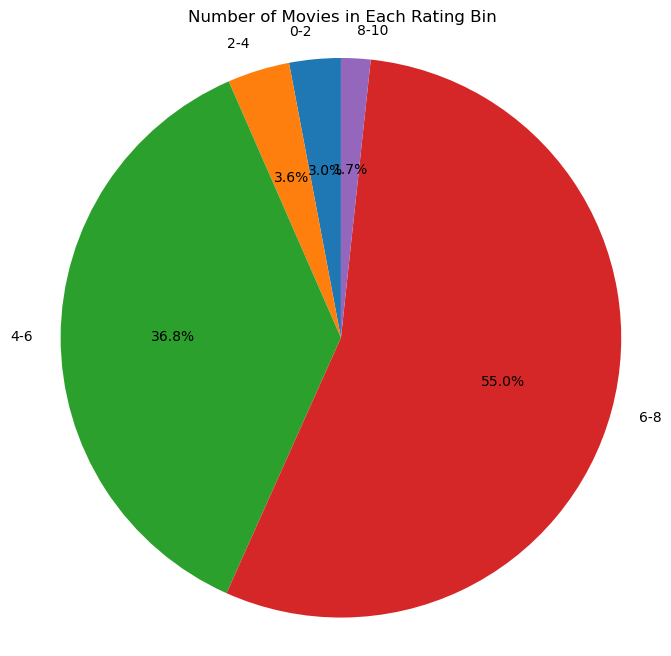

In [13]:

# Create bins for ratings
bins = [0, 2, 4, 6, 8, 10]  # Define the bin edges
labels = ['0-2', '2-4', '4-6', '6-8', '8-10']  # Labels for the bins

# Assign the ratings to the bins
df['rating_bin'] = pd.cut(df['rating'], bins=bins, labels=labels, include_lowest=True)

# Count the number of movies in each bin
bin_counts = df['rating_bin'].value_counts().sort_index()

# Plot the number of movies in each bin as a pie chart
plt.figure(figsize=(8, 8))
plt.pie(bin_counts, labels=bin_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Number of Movies in Each Rating Bin')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()


plotting the top movies haviong highest rating count 

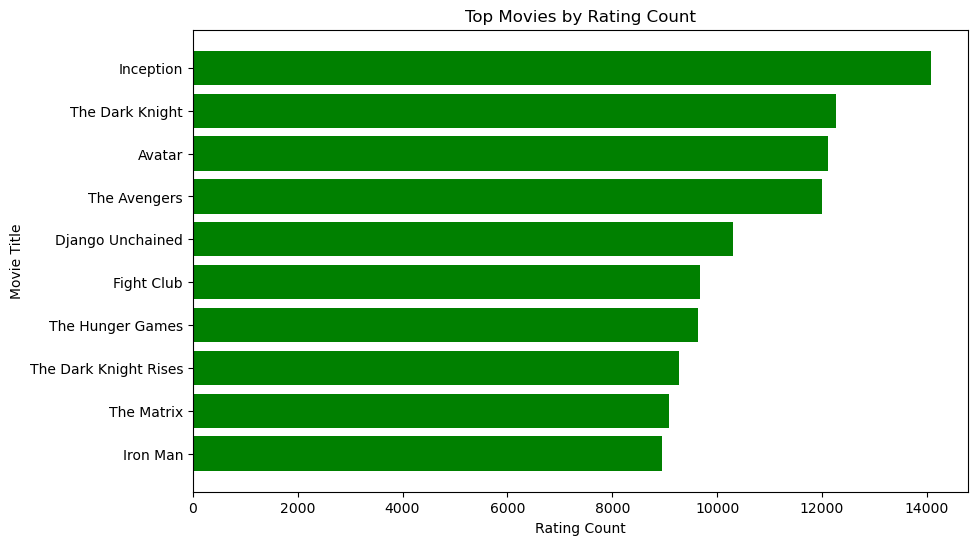

In [14]:

# Sort the DataFrame by 'rating_count' column in descending order
sorted_df = df.sort_values('rating_count', ascending=False)

# Select the top and worst movies based on rating count
top_movies = sorted_df.head(10)

# Plot the top movies
plt.figure(figsize=(10, 6))
plt.barh(top_movies['movie_title'], top_movies['rating_count'], color='green')
plt.xlabel('Rating Count')
plt.ylabel('Movie Title')
plt.title('Top Movies by Rating Count')
plt.gca().invert_yaxis()  # Invert the y-axis to display highest-rated movie at the top
plt.show()




plotting the movies with highest run time 

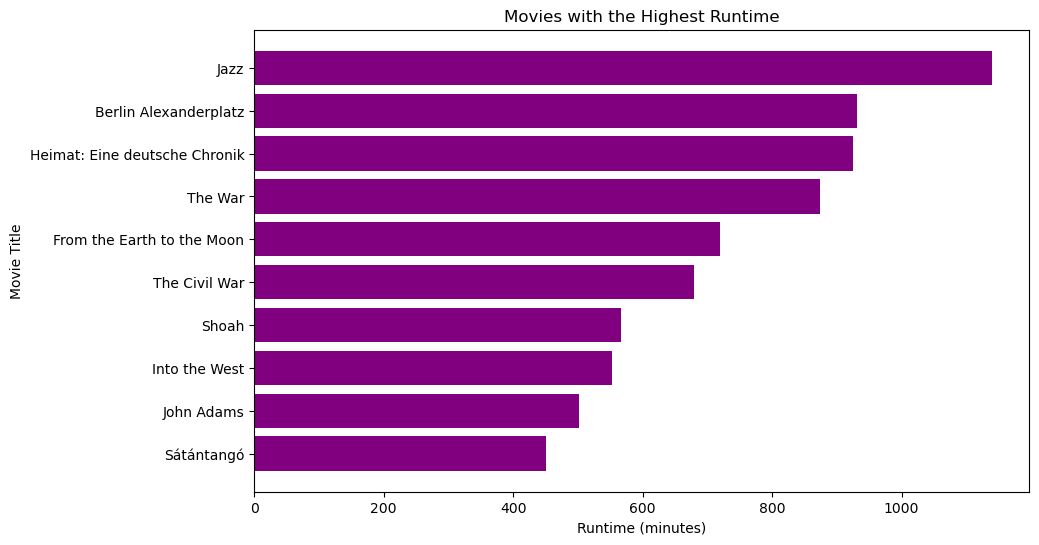

In [15]:

# Sort the DataFrame by 'runtime' column in descending order
sorted_df = df.sort_values('runtime', ascending=False)

# Select the movies with the highest runtime
top_movies = sorted_df.head(10)

# Plot the movies with the highest runtime
plt.figure(figsize=(10, 6))
plt.barh(top_movies['movie_title'], top_movies['runtime'], color='purple')
plt.xlabel('Runtime (minutes)')
plt.ylabel('Movie Title')
plt.title('Movies with the Highest Runtime')
plt.gca().invert_yaxis()  # Invert the y-axis to display movies with the highest runtime at the top
plt.show()


In [16]:

# Check for duplicates in the 'movie_title' column
duplicate_titles = df.duplicated(subset='movie_title', keep=False)

# Print the duplicate movie titles
print("Duplicate movie titles:")
print(df[duplicate_titles]['movie_title'])

# Remove duplicates from the DataFrame
df = df.drop_duplicates(subset='movie_title', keep='first')

# Now df_unique_titles contains the DataFrame without duplicates in the 'movie_title' column


Duplicate movie titles:
5                 Heat
6              Sabrina
25             Othello
27          Persuasion
40         Richard III
             ...      
20163    Promised Land
20172       Judas Kiss
20197           Pusher
20247       Stone Cold
20250            Cargo
Name: movie_title, Length: 1289, dtype: object


collabrative filtering

content based filtering

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

# Assuming you have a DataFrame called 'df' with columns 'movie_id', 'movie_title', 'genres', and 'overview'

# Create a TF-IDF vectorizer object
tfidf_vectorizer = TfidfVectorizer(stop_words='english')

# Convert the 'overview' column into TF-IDF vectors
tfidf_matrix = tfidf_vectorizer.fit_transform(df['overview'])

# Calculate the cosine similarity between movie overviews
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

# Create a mapping of movie titles to their corresponding indices
indices = pd.Series(df.index, index=df['movie_title']).drop_duplicates()

# Function to get content-based recommendations
def get_content_based_recommendations(movie_title, n_recommendations=10):
    try:
        idx = indices[movie_title]
    except KeyError:
        print("Movie title '{}' not found in the dataset.".format(movie_title))
        return []
    
    # Get the pairwise similarity scores of the movie with all other movies
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on similarity scores in descending order
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the movie indices of the top recommendations
    movie_indices = [i for i, _ in sim_scores[1:n_recommendations + 1]]

    # Get the movie titles based on the indices
    recommended_movies = df['movie_title'].iloc[movie_indices].tolist()

    return recommended_movies

# Example usage: Get content-based recommendations for movie with title 'Toy Story'
movie_title = 'Jurassic Park'
content_based_recommendations = get_content_based_recommendations(movie_title)
print("Content-based recommendations for movie '{}': {}".format(movie_title, content_based_recommendations))


Content-based recommendations for movie 'Jurassic Park': ['Pentathlon', 'The Toy', 'Easy Street', "L'appât", 'Fallen Angel', 'Beyond the Stars', 'The Boy Who Could Fly', 'Moral Tales, Filmic Issues', 'The Screaming Skull', 'Exotica']
